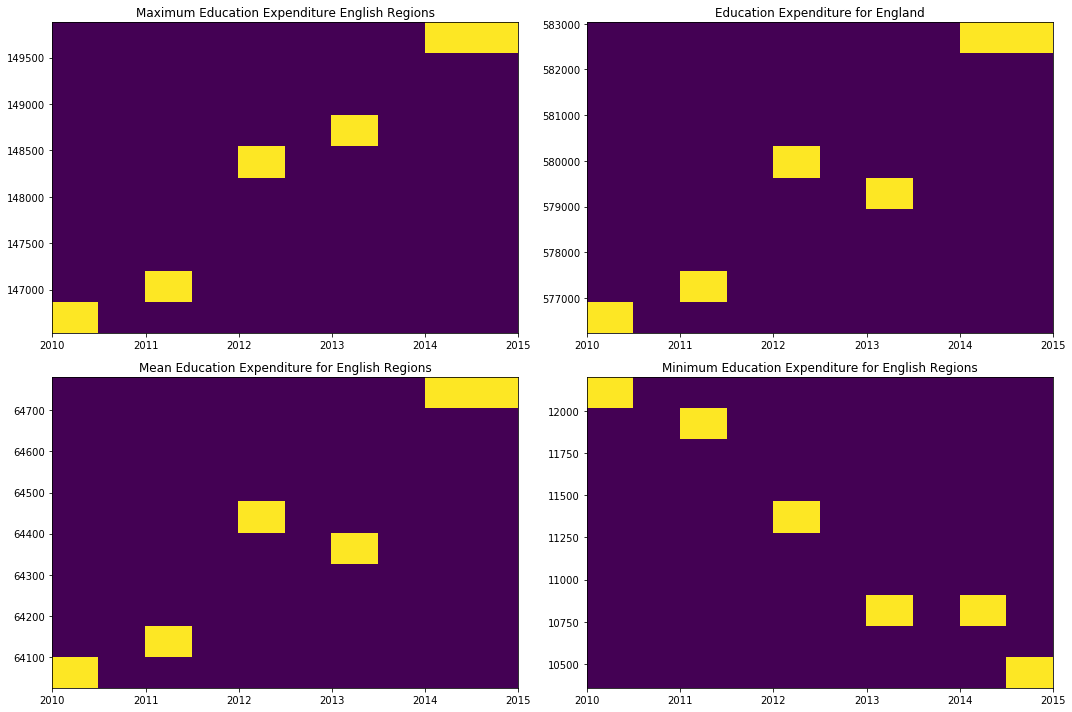

In [4]:
from pandas.io.json import json_normalize
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import datetime
client = MongoClient()
db = client.test
collection = db['EducationHeadCount']
cursor = list(collection.find({}, {'_id': False}))
result = json_normalize(cursor)
head = result['Period_label'].str.replace('/..', '')
head = head.map(lambda x: x.rstrip(' (academic)'))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist2d(head.astype(int),result['Maximum_english_regions'].astype(int))
ax0.set_title('Maximum Education Expenditure English Regions')

ax1.hist2d(head.astype(int),result['England'].astype(int))
ax1.set_title('Education Expenditure for England')

ax2.hist2d(head.astype(int),result['Mean_english_regions'].astype(int))
ax2.set_title('Mean Education Expenditure for English Regions')

ax3.hist2d(head.astype(int),result['Minimum_english_regions'].astype(int))
ax3.set_title('Minimum Education Expenditure for English Regions')

fig.tight_layout()
plt.show()